# Comparing Commonly Used Crop Maps

Agriculture, which includes cropland and pastureland, uses more land on Earth than any other human activity. And the expansion of agriculture into forests, grasslands, and other natural areas comes at tremendous ecological cost. This expansion is the leading cause of biodiversity loss and generates about [12% of anthropogenic greenhouse gas emissions](https://unfccc.int/topics/land-use/the-big-picture/introduction-to-land-use). But different methods are used for developing maps of agricultural area, creating some uncertainty about the true extent of croplands and pasturelands.

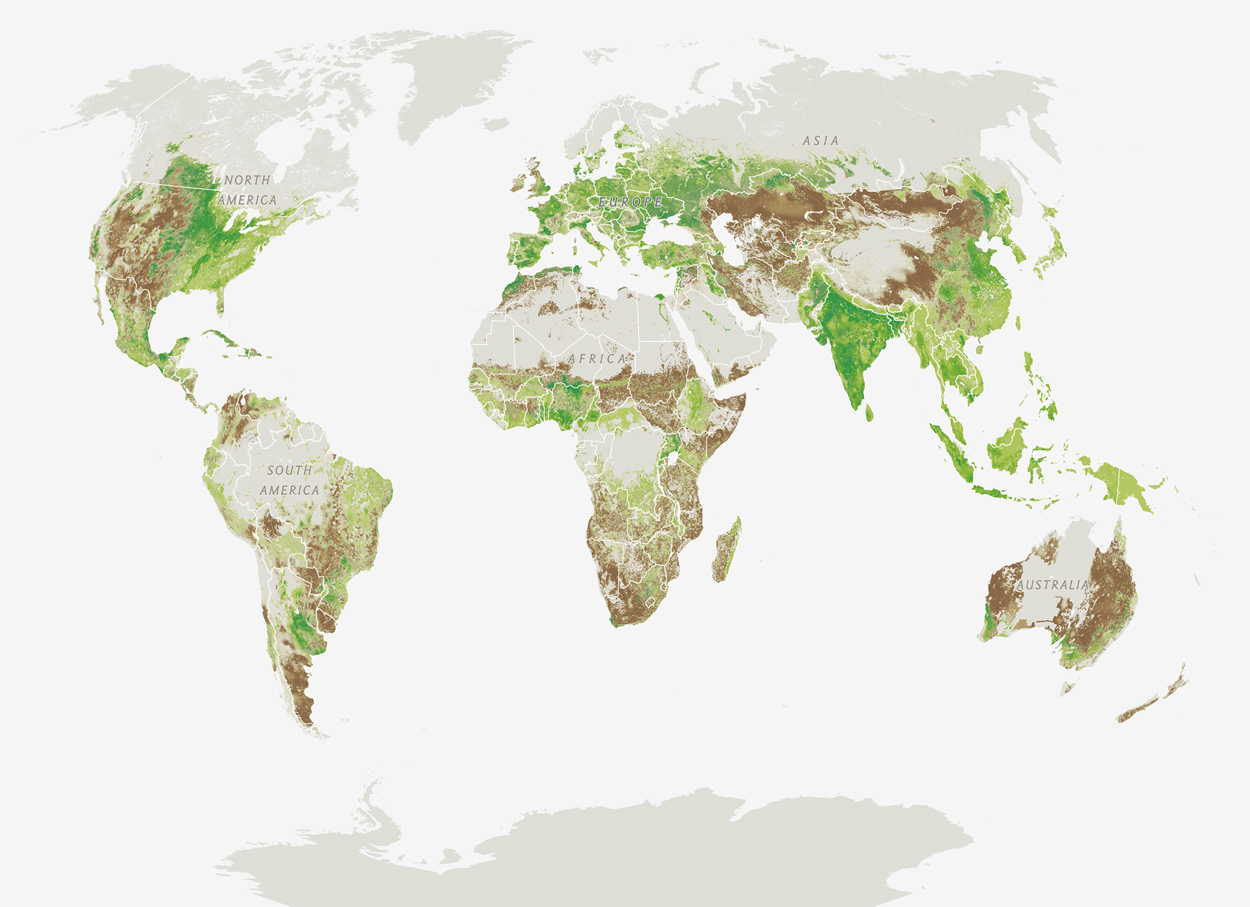
The image above shows the extent of croplands (in green) and pastures (in brown). Taken together, these land uses take up about 40% of Earth's surface [(Foley et al. 2011)](https://www.nature.com/articles/nature10452).

Researchers need reliable crop maps to understand how agricultural extent is changing over time. This research aims to provide reproducible code to compare maps of the extent of individual crops (such as rice, wheat, or maize) developed at different institutions, so that researchers can easily see how they differ.

The code below will compare two global maps of crop extent and provide a map and spreadsheet of the differences. National and subnational boundary data are from the Database of Global Administrative Areas [(GADM)](https://gadm.org/).

This research is part of Emily Cassidy's final project for the University of Colorado, Boulder's Earth Data Analytics Certificate program.

## Installation instructions 

This code should work if you have the latest version of either Miniconda or Anaconda Python packages installed on your computer. For instructions for how to set that up, follow the CU Boulder Earth Data Analytics instructions for setting up [Python, Git, Bash Environment On Your Computer](https://www.earthdatascience.org/workshops/setup-earth-analytics-python/setup-git-bash-conda/).


## Data Used

This code compares crop-specific cropland maps from:

1. [Earthstat](http://www.earthstat.org/), a data collection developed by researchers at the University of Minnesota and University of British Colombia (and formerly the University of Wisconsin, Madison). The crop-specific maps can be found at [earthstat.org/harvested-area-yield-175-crops](http://www.earthstat.org/harvested-area-yield-175-crops/)
The data citation is: 
Monfreda, C., N. Ramankutty, and J. A. Foley (2008), Farming the planet: 2. Geographic distribution of crop areas, yields, physiological types, and net primary production in the year 2000, Global Biogeochem. Cycles, 22, GB1022, doi: 10.1029/2007GB002947.

2. [MapSPAM](https://www.mapspam.info/data/) data from the International Food Policy Research Institute (IFRPI) and Harvard University. Their SPAM 2000 v3.0.7 Global Data from 2019 was used. 
The citation for this data is: 
International Food Policy Research Institute, 2019, “Global Spatially-Disaggregated Crop Production Statistics Data for 2000 Version 3.0.7”, https://doi.org/10.7910/DVN/A50I2T, Harvard Dataverse, V1.


## Workflow

A breif summary of the code workflow is below.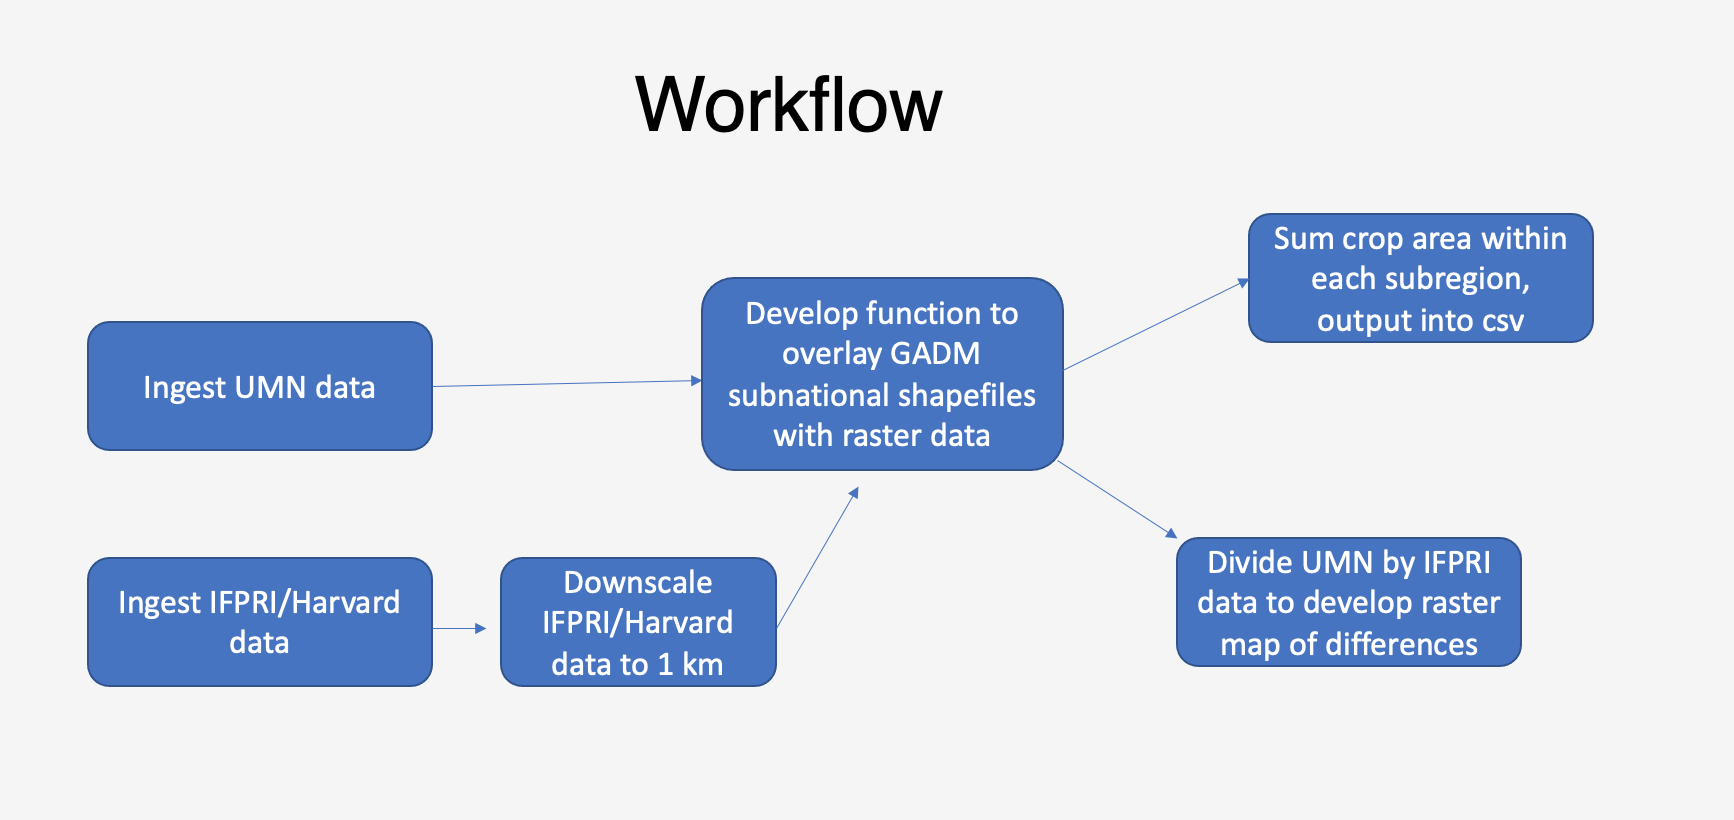

## Import Python Packages

In [1]:
from glob import glob
import os

import earthpy as et
import pandas as pd
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import rioxarray as rxr


## Set Working Directory 
The code below uses the os package to set the working directory to ~/earth-analytics/data/

In [2]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
data_folder_path = os.path.join("data")

# To make the code reproducible, we check to see 
# if the earthanalytics/data/ directory exists, if not, we make it.

if os.path.exists(data_folder_path):
    os.chdir(data_folder_path)
    print("data directory exists")
else:
    print("data directory does not existing, making data directory")
    os.makedir(data_folder_path)
    os.chdir(data_folder_path)

data directory exists


In [3]:
# Download UMN Earthstat Crop maps
et.data.get_data(url ="https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/soybean_HarvAreaYield_Geotiff.zip")

'/Users/emilycassidy/earth-analytics/data/earthpy-downloads/soybean_HarvAreaYield_Geotiff'

In [4]:
# Open UMN Crop maps

crop_map_path = os.path.join(
    "earthpy-downloads", "soybean_HarvAreaYield_Geotiff", 
    "soybean_HarvAreaYield_Geotiff", "soybean_HarvestedAreaHectares.tif")

crop_map_data = rxr.open_rasterio(crop_map_path, masked=True)
crop_map_data

<xarray.DataArray (band: 1, y: 2160, x: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * y            (y) float64 89.96 89.87 89.79 89.71 ... -89.79 -89.88 -89.96
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [6]:
# Mask out zero values so we can clearly see crop extent
crop_map_masked = crop_map_data.where(crop_map_data > 0)
crop_map_masked

<xarray.DataArray (band: 1, y: 2160, x: 4320)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * y            (y) float64 89.96 89.87 89.79 89.71 ... -89.79 -89.88 -89.96
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

## View the data
In the cell below, we plot the data 

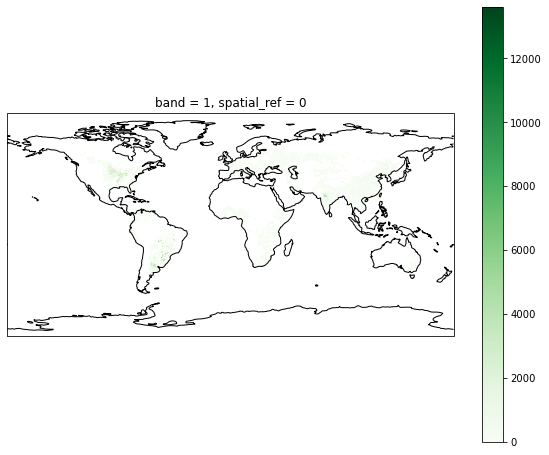

In [7]:

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cmap = plt.get_cmap('Greens') 
crop_map_masked.plot(ax=ax, cmap=cmap, transform=ccrs.PlateCarree())
plt.savefig("UMN_soy_harvested_area.jpg")

In [6]:
projection = crop_map_data.rio.crs
projection

CRS.from_epsg(4326)

## Explore data values with a histogram

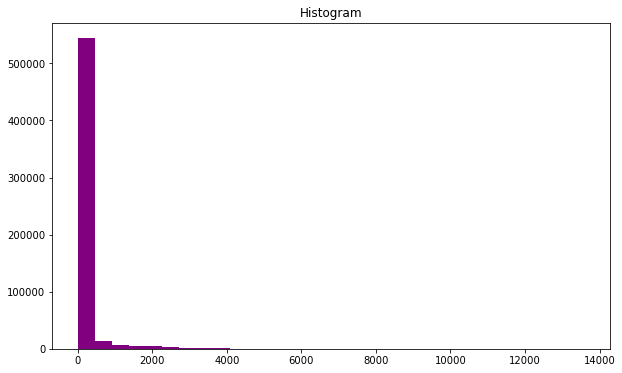

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
crop_map_masked.plot.hist(ax=ax,
                       color="purple",
                       bins=30)
plt.show()

In [9]:
et.data.get_data(url = "https://s3.amazonaws.com/mapspam/2000/v3.0.7/geotiff/spam2000v3.0.7_global_harvested-area.geotiff.zip")

'/Users/emilycassidy/earth-analytics/data/earthpy-downloads/spam2000v3.0.7_global_harvested-area.geotiff'

In [10]:
# Open IFPRI data

ifpri_crop_map_path = os.path.join(
    "earthpy-downloads", "spam2000v3.0.7_global_harvested-area.geotiff", 
    "spam2000v3r7_harvested-area_SOYB.tif")

ifpri_crop_map_data = rxr.open_rasterio(ifpri_crop_map_path, masked=True)
ifpri_crop_map_data

<xarray.DataArray (band: 1, y: 2160, x: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * y            (y) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.87 -89.96
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [11]:
# Mask out zero values so we can clearly see crop extent
ifpri_masked = ifpri_crop_map_data.where(ifpri_crop_map_data > 0)
ifpri_masked

<xarray.DataArray (band: 1, y: 2160, x: 4320)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * y            (y) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.87 -89.96
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

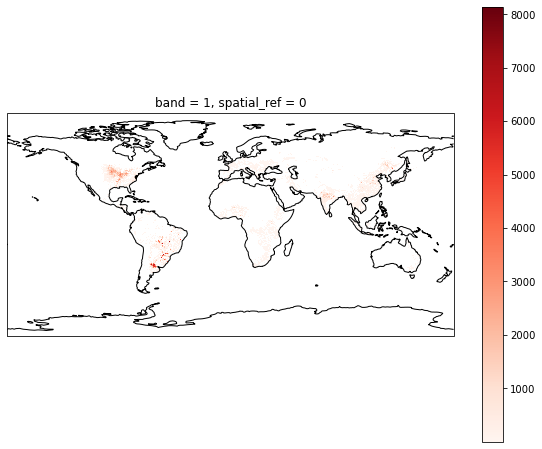

In [12]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cmap = plt.get_cmap('Reds') 
ifpri_masked.plot(ax=ax, cmap=cmap, transform=ccrs.PlateCarree())
plt.savefig("IFPRI_soy_harvested_area.jpg")

## Explore data values with a histogram

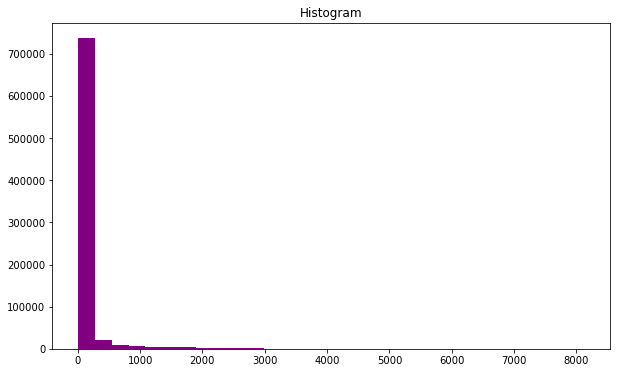

In [13]:
f, ax = plt.subplots(figsize=(10, 6))
ifpri_crop_map_data.plot.hist(ax=ax,
                       color="purple",
                       bins=30)
plt.show()

In [14]:
# Download GADM data
et.data.get_data(url ="https://geodata.ucdavis.edu/gadm/gadm4.0/gadm404-shp.zip")

Extracted output to /Users/emilycassidy/earth-analytics/data/earthpy-downloads/gadm404-shp


'/Users/emilycassidy/earth-analytics/data/earthpy-downloads/gadm404-shp'

## Results So Far

So far this code allows us to open and explore the maps. In the coming weeks, I will be developing a function to make the data the same spatial resolution. And I will be exploring wyas to output the data with the GADM boundaries.